<div align="right" style="text-align: right"><i>Peter Norvig<br>Updated Sep 2018, May 2020</i></div>

![the count](https://vignette.wikia.nocookie.net/muppet/images/9/90/CountCountsLP%282%29.jpg/revision/latest/scale-to-width-down/280?cb=20140628202329)

# How to Count Things

Sesame Street teaches us to  count up to ten using our fingers. A computer doesn't have fingers, but it too can use brute force, enumerating things one by one, to easily count up to a billion or so. So in that sense, a billion is a small number. It is rare to get more than a billion <i>things</i> together in one place, but it is common to encounter situations where there many billions of <i>combinations</i> of things; indeed many problems have <a href="http://norvig.com/atoms.html">more combinations of things than the number of atoms in the Universe</a>. 

Thus, for really big numbers we need a portfolio of counting strategies. Here is a partial list:

- **Brute Force enumeration**: Generate all the things, and count them one by one. <br>*Example*: How many odd numbers from 1 to 10? Answer: Generate {1, 3, 5, 7, 9}, count 5.
- **Enumerate and test**: Generate a larger set of candidate things, and count the ones that satisfy some criteria. <br>*Example*: How many odd prime numbers from 1 to 10? Answer: Generate {1, 3, 5, 7, 9}, test each one for primality, count 3.
- **Incremental enumeration**: When the things we are counting have parts, don't generate all possible complete things and then check each one to see if it is valid. Instead, generate the first part of a thing, and check if that part is valid so far. If it is, generate all the possibilities for the next part, but if it is not, stop there. That means that many invalid things will never get generated, saving time.<br>*Example*: Given a set of *n* cities, how many acyclic paths through some subset of cities are in alphabetical order by city name? Brute force enumeration would generate all permutations up to length *n* and check if each one was alphabetical; incremental enumeration would start generating paths and only extend them with cities in the correct order.
- **Abstract enumeration**: put the things into equivalence classes, and calculate how many there are in each class. Then we don't have to enumerate all the things; we can consider many at the same time.
- **Divide and conquer**: Split the problem into parts, solve each part, and combine the results.<br>*Example*: How many ways are there of getting a straight flush in poker? We can divide the problem into 4 subproblems, one for each suit. Then for each suit we can say: a straight can have one of 10 different high cards (5 through Ace), so there are 10 possible straights for each suit. The total number of straight flushes is 40, which you can think of either as multiplying 4 and 10, the numbers from the two independent components of the problem, or you can think of as adding 10+10+10+10 for the four disjoint parts of the problem.
- **Recursive divide and conquer**: often we break a problem down into smaller pieces that are recursive instances of the same type of problem. We conquer by solving the smaller pieces and combining results.<br>*Example*: How many permutations are there of *n* things? If *n* > 0, solve by finding the number of permutations of *n* - 1 things, and multiplying by *n*.
- **Formula calculation**: Use mathematical thinking to derive a formula for the number of things. <br>*Example*: How many odd numbers from 1 to *n*? The formula is ⌈n/2⌉, meaning "divide *n* by 2 and round up".
- **Remembering**: Sometimes there are multiple ways to break a problem into subproblems, and when solving the big problem we may come across the same subproblem more than once. We can remember the solution to the subproblem so that we don't recompute it multiple times. We call that *memoizing* or *caching* the results; we can use the decorator `@lru_cache`.
- **Simulation**: Sometimes it is difficult to exactly count all the things. But you can do a random simulation in which you record the things that randomly come up, and use those results as an estimate.
- **Visualization**: When you're stuck, making a chart or table or plot of examples can help you see patterns that can lead to solutions.
- **Checking**: make sure that your calculations work for small test cases that you verify by hand. Create two different programs and check that they agree with each other. A common approach is to have one straightforward but inefficient program that is easy to see is correct, and one program that is optimized for speed but more complex. If the two programs agree on the small inputs, you can have more confidence they are both correct.)
- **Standing on shoulders**: it is fun to solve a problem on your own, but sometimes the right approach is to look up how others have solved it before. Sometimes you need to do some work to understand the problem better before you know how to search for a prior solution.<br>*Example*: In how many ways can a convex polygon be cut into triangles by connecting vertices? You could type the question directly as [a search](https://www.google.com/search?q=In+how+many+ways+can+a+convex+polygon+be+cut+into+triangles+by+connecting+vertices) and find some helpful answers. You could also solve the problem for small polygons (with *n* = 3 to 7 sides), note that the sequence of answers is ["1, 2, 5, 14, 42"](https://www.google.com/search?q=%221%2C+2%2C+5%2C+14%2C+42%22&oq=%221%2C+2%2C+5%2C+14%2C+42%22) and see that a search reveals that  these are called [Catalan Numbers](https://en.wikipedia.org/wiki/Catalan_number) and that there is a lot written about them.<br>*Example*: A coach wants to create a basketball lineup of three shooters and two rebounders. She has seven shooters and five rebounders to select from. How many different lineups can she make? Entering the text of the whole problem as a search query gives [results about basketball](https://www.google.com/search?q=A+coach+wants+to+create+a+basketball+lineup+of+three+shooters+and+two+rebounders.+She+has+seven+shooters+and+five+rebounders+to+select+from.+How+many+different+lineups+can+she+make%3F&oq=A+coach+wants+to+create+a+basketball+lineup+of+three+shooters+and+two+rebounders.+She+has+seven+shooters+and+five+rebounders+to+select+from.+How+many+different+lineups+can+she+make), not about combinatorics.  You need to understand the problem and standard terminology well enough to realize that a better query is [7 choose 3 * 5 choose 2](https://www.google.com/search?q=7+choose+3+*+5+choose+2).

# Preliminaries: Imports and Utilities

Before getting started, here are the necessary imports, and four oft-used utility functions:
- `quantify` (from [the `itertools` module recipes](https://docs.python.org/3/library/itertools.html)) takes a collection of things and a predicate and counts for how many things the predicate is true. It is designed for the **enumerate and test** strategy, but can be used for the **brute force enumeration** strategy by omitting the optional predicate (as long as none of the things you want to count are false (like `0` or the empty string).
- `total` totals up all the values in a `dict` or `Counter`. Helpful because `sum(counter)` would sum the keys, not the values.
- `iterate`: The pattern of repeatedly calling a function *n* times will be common in this notebook; `iterate(f, x, n)`, a function [borrowed](https://hackage.haskell.org/package/base-4.14.0.0/docs/Prelude.html#v:iterate) from  Haskell, encapsulates the pattern.
- `same`: Tests if two functions return the same output for all the given inputs.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
from collections import Counter, namedtuple
from functools   import lru_cache
from itertools   import product, permutations, combinations, islice
from math        import factorial, log
from statistics  import mean, stdev
from sys         import maxsize

def quantify(iterable, predicate=bool) -> int: 
    """Count the number of items in iterable for which the predicate is true."""
    return sum(1 for item in iterable if predicate(item)) 

def total(counter) -> int:
    """The sum of all the values in a Counter (or dict or other mapping)."""
    return sum(counter.values())

def iterate(f, x, n) -> object:
    """Return f^n(x); for example, iterate(f, x, 3) == f(f(f(x)))."""
    for _ in range(n):
        x = f(x)
    return x

def same(fn1, fn2, inputs) -> bool:
    """Verify whether fn1(x) == fn2(x) for all x in inputs."""
    return all(fn1(x) == fn2(x) for x in inputs)

# Problem: Counting Barcodes

> A typical barcode is pictured below. A valid barcode consists of alternating black and white stripes, where each stripe is either 1, 2, or 3 units wide. For a box that is *n* units wide, how many different valid barcodes are there?

![barcode](https://help.shopify.com/assets/manual/sell-in-person/hardware/barcode-scanner/1d-barcode-4fbf513f48675746ba39d9ea5078f377e5e1bb9de2966336088af8394b893b78.png)

We'll represent a unit as a character, `'B'` or `'W'`, and a barcode as a string of *n* units. The barcode above would start with `'BWWBW...'`.  A valid string is one without 4 of the same character/unit in a row; `valid_barcode` tests for this.

We'll start with the  **enumerate and test** strategy: generate `all_strings` of *n* units and count how many are valid with `enumerate_barcodes`:

In [2]:
def enumerate_barcodes(n) -> int: 
    """Enumerate all barcodes of n units and count how many are valid."""
    return quantify(all_strings('BW', n), valid_barcode)

def all_strings(alphabet, n): 
    """All strings of length n over the given alphabet."""
    return {''.join(chars) for chars in product(alphabet, repeat=n)}

def valid_barcode(code) -> bool: 
    """A valid barcode does not have 4 or more of the same unit in a row."""
    return 'BBBB' not in code and 'WWWW' not in code

Here are all the strings of length 3:

In [3]:
all_strings('BW', 3)

{'BBB', 'BBW', 'BWB', 'BWW', 'WBB', 'WBW', 'WWB', 'WWW'}

Here is a table of counts of valid barcodes for small values of *n*:

In [4]:
{n: enumerate_barcodes(n) for n in range(13)}

{0: 1,
 1: 2,
 2: 4,
 3: 8,
 4: 14,
 5: 26,
 6: 48,
 7: 88,
 8: 162,
 9: 298,
 10: 548,
 11: 1008,
 12: 1854}

This approach enumerates a lot of strings that can't possibly be valid. For example, there are 1024 strings of length 14 that start with `'BBBB...'` and none of them are valid. We could save a lot of time if we stopped generating such strings after we see the `'BBBB'`. 

The **incremental enumeration** strategy starts with all the valid strings of length 0 (there is only one, the empty string), and then repeats *n* times the process of appending one unit (`'B'` or `'W'`) to each string, if that append would be valid.

In [5]:
def incremental_count_barcodes(n): 
    """Count how many barcodes of length n are valid."""
    barcodes = {''}
    for _ in range(n):
        barcodes = extend_barcodes(barcodes)
    return len(barcodes)

def extend_barcodes(barcodes) -> set:
    """All valid ways to add one unit to each of a set of barcodes."""
    return {barcode + unit for barcode in barcodes for unit in 'BW'
            if not barcode.endswith(3 * unit)}

The four lines of code in the body of `incremental_count_barcodes` are exactly the pattern encapsulated in the `iterate` higher-order function. So we can rewrite `incremental_count_barcodes` with a one-line body:

In [6]:
def incremental_count_barcodes(n): 
    """Count how many barcodes of length n are valid."""
    return len(iterate(extend_barcodes, {''}, n))

Try it:

In [7]:
incremental_count_barcodes(12)

1854

Verify that the results are the same for small *n*:

In [8]:
same(enumerate_barcodes, incremental_count_barcodes, range(13))

True

Here's how I think about a more efficient approach:
* I can use **abstract incremental enumeration**: find a representation that summarizes all the barcodes of length zero, then incremently extend that summary to get a summary of the barcodes of length 1. Do that *n* times.
* At each step, the key information that needs to be in the summary is how many barcode units of the same color are at the *end* of a barcode: if it is 1 or 2, then we can add another instance of the same color to the end. If it is 3, we cannot. We can always add the opposite color, and then the resulting barcode will end in just one unit of the same color. 
* Thus, the summary will be a list of four counts: `[e0, e1, e2, e3]`, where `ei` gives the number of strings that end in `i` units of the same color. 
* To take this summary and extend it by one unit to make the next summary:
   - For all the counts except `e3` we could add a unit of the same color; that would show up in the next higher position (e.g. a count of 4 in `e1` would show up as a count of 4 in `e2` in the next summary).
   - For all the counts, we could add a unit of the opposite color; the sum of them would show up in `e1` of the next summary.
* The function `abstract_barcodes(n)` does this update `n` times (using `iterate`) and in the end takes the sum of the four counts in the summary.
* With **brute force enumeration**, incrementing *n* by 1 doubles the amount of work (because you double the number of candidate strings). With **incremental enumeration** there are fewer strings, but still an exponential number of them.
* With the **abstract incremental** approach, incrementing *n* by 1 does a constant amount of work. Thus the total complexity is *O*(*n*), instead of *O*(2<sup>*n*</sup>) for **brute force enumeration** and (we will see later) approximately *O*(1.8<sup>*n*</sup>) for **incremental enumeration**.

We can code that up as follows:

In [9]:
barcodes0 = [1, 0, 0, 0] # Summary of ending-counts of barcodes of length n=0

def abstract_barcodes(n) -> int: 
    """Count how many barcodes of length n are valid."""
    return sum(iterate(extend_barcodesummary, barcodes0, n))

def extend_barcodesummary(barcodes) -> list:
    """Given a summary of barcodes of length n, build a summary for length n+1."""
    e0, e1, e2, e3 = barcodes
    return [0, sum(barcodes) + e0, e1, e2]

Verify that we get the same results for small values of *n*:

In [10]:
same(enumerate_barcodes, abstract_barcodes, range(20))

True

We can examine the first few summaries:

In [11]:
{n: iterate(extend_barcodesummary, barcodes0, n) for n in range(10)}

{0: [1, 0, 0, 0],
 1: [0, 2, 0, 0],
 2: [0, 2, 2, 0],
 3: [0, 4, 2, 2],
 4: [0, 8, 4, 2],
 5: [0, 14, 8, 4],
 6: [0, 26, 14, 8],
 7: [0, 48, 26, 14],
 8: [0, 88, 48, 26],
 9: [0, 162, 88, 48]}

`abstract_barcodes` can quickly compute very big numbers that `enumerate_barcodes` could never handle:

In [12]:
%time abstract_barcodes(10000)

CPU times: user 11.3 ms, sys: 643 µs, total: 12 ms
Wall time: 12.6 ms


3861431277625007961956955484353530119634001892816040917233932945064320273497370215771811960744678098449553175356862760450029708838175822242262792740296878964074883622671541479265048463512360941352413049264274485743297728357502930085506419846119753743423275462450713981257123756695327534235952507322555045959925039572403245743061549541274972562526816439217931608999532601457740681763142591939324781110768274782850152125981385364637513839024687081770052346957401052189529936883629883775724870785833452510126377097128195647948735625551805771200981065390268401761158588370204299868440790417559363818139283430755197453196664541025472104658523804014518931760254828135638415413408780736125999685589725526874318196976263624936793335541955083569139572617638693840543637407782446933562063756941909207810703824222697116352937601482868529114899390708691493432262019965964035273813939182009029538539757438413668036430833988535147478776959903569999055599703304516221455076523484352182404159659661240973630499557250

That's a big number! And it only took about 10 milliseconds! How many digits is the result?

In [13]:
def digits(n: int) -> int: return len(str(n))

digits(abstract_barcodes(10000))

2647

So the number of valid barcodes of length 10,000 is more than 10<sup>2646</sup>. 

We can apply the **shoulders of giants** strategy and search for the first few numbers in the series, ["1, 2, 4, 8, 14, 26, 48"](https://www.google.com/search?q=%221%2C+2%2C+4%2C+8%2C+14%2C+26+48%22), and get as the first result the page [oeis.org/A135491](https://oeis.org/A135491), titled *Number of ways to toss a coin n times and not get a run of four*, which sounds right. [OEIS](https://oeis.org/), the On-Line Encyclopedia of Integer Sequences®, is a fantastic resource for all those who count things, and often shows up in searches like this.



# Problem: Counting Student Records (Late/Absent/Present)

> Students at a school must check in with the guidance counselor if they have three total absences, or three consecutive late days. Each student's attendance record consists of a string of 'A' for absent, 'L' for late, or 'P' for present. For example: "LAPPLAA" requires a meeting (because there are three absences), and "LAPPLAL" is OK (there are three late days, but they are not consecutive). How many attendance records of length *n* days are OK?

The **brute force enumeration** strategy applies in a similar way to the previous problem. Define what it means for a record to be `ok`, generate all the strings of length *n*, and count how many of them are `ok`.

In [14]:
def ok(record: str) -> bool: 
    """Is this student record OK? (Not 3 absences, nor 3 consecutive lates.)"""
    return record.count('A') < 3 and 'LLL' not in record

def enumerate_count_ok(n) -> int:
    """How many attendance records of length n are ok?"""
    return quantify(all_strings('LAP', n), ok)

In [15]:
{n: enumerate_count_ok(n) for n in range(11)}

{0: 1,
 1: 3,
 2: 9,
 3: 25,
 4: 67,
 5: 171,
 6: 419,
 7: 994,
 8: 2296,
 9: 5188,
 10: 11510}

This looks good, but there are 3<sup>*n*</sup> strings of length *n*, so for large values of *n*
we will need a more efficient strategy.

* The **abstract incremental enumeration** strategy is again applicable: find a representation that summarizes all the attendance records of length zero, then incremently extend the length by 1, and do that *n* times. The function `abstract_count_ok` implements this approach, again using `iterate`.
* What is in the summary? A list of all `ok` records is too much. A simple count of the number of `ok` records is not enough. Instead, we need several different counts, for several different classes of records. Each class is defined by the number of `'A'` characters in the records, and the number of consecutive `'L'` characters at the *end* of the records, because these are the two things that determine whether the string will be `ok` or not `ok` when we add letters to the end).  So the summary can be represented as  a `Counter` of the form `{(A, L): count, ...}`. For example the summary `{(1, 2): 3, ...}` means that there are 3 `ok` records that contain one `'A'` and end in two `'L'`s. They records aren't explicitly named in the summary (that's why the summary can be efficient), but they would be `{'APLL', 'LALL', 'PALL'}`.
* For *n* = 0, the summary is `{(0, 0): 1}`: one record of length 0, the empty string, which has no `'A'` in it and no `'L'` at the end. 
* The function `extend_one_day` says that we can add an `'A'` to any string that doesn't already have two `'A'`s; we can add an `L` to any string that doesn't already end in 2 `'L'`s; and we can add a `'P'` to any string.

In [16]:
records0 = Counter({(0, 0): 1})

def abstract_count_ok(n) -> int:
    """How many attendance records of length n are ok?"""
    return total(iterate(extend_records, records0, n))

def extend_records(records: Counter) -> Counter:
    """Given a summary of records of length n in the form {(A, L): count}, 
    build a summary of records of length n + 1."""
    next_records = Counter()
    for (A, L), count in records.items():
        if A < 2: next_records[A + 1, 0] += count # add an 'A'
        if L < 2: next_records[A, L + 1] += count # add an 'L'
        next_records[A, 0] += count               # add a  'P'
    return next_records

Verify that `abstract_count_ok` gets the same counts as `enumerate_count_ok`:

In [17]:
same(abstract_count_ok, enumerate_count_ok, range(11))

True

Here are the first few summaries of records of length *n*:

In [18]:
{n: iterate(extend_records, records0, n) for n in range(4)}

{0: Counter({(0, 0): 1}),
 1: Counter({(1, 0): 1, (0, 1): 1, (0, 0): 1}),
 2: Counter({(2, 0): 1,
          (1, 1): 1,
          (1, 0): 3,
          (0, 2): 1,
          (0, 0): 2,
          (0, 1): 1}),
 3: Counter({(2, 1): 1,
          (2, 0): 5,
          (1, 2): 1,
          (1, 0): 8,
          (1, 1): 3,
          (0, 0): 4,
          (0, 1): 2,
          (0, 2): 1})}

For example, the entry for `1:` says there are 3 total  strings of length one; one of which contains 1 `A` and does not end in `L`; one of which does not contain an `A` and does end in one `L`, and one of which has neither `A` nor `L`. 

Of course `abstract_count_ok` can go *way* beyond what we could do with `enumerate_count_ok`:

In [19]:
abstract_count_ok(10000)

6791509224494624552676112153996106566735471033948438940339850232266590331722726956343198798554885056992613262286536878154019764717540933520444631866276453490356377721045373621125515931485899392396978604681929695093324681063430389740551275227203242665164206488847618041550691269351390934293304633103847461950908176378476555035206733416590157324429655638315962555619714809170516518288765887158876041512459852825489504693976629490899160255083358555887258410992581597556395051827049288642438641888703822536755797758059894045652914631740461793035932216481612898230139984735549496111654732329953109234692409057884849006381092972629423555362471477156827738130077877004474040383992252225990342599243810555632823219083752307694550583728957021812981521865750455310818608106834428032048711212998053855833065394092762027419861187097888476511330222214757434003745277594617115847948156910957747949528421398863346984709759989709126235397293994061074297396776866563960826013807178825367207730295017054457365909802532

That looks like a roughly similar number of digits as `abstract_barcodes(10000)`; let's compare:

In [20]:
N = 10000
digits(abstract_count_ok(N)), digits(abstract_barcodes(N))

(2654, 2647)

So `abstract_count_ok(10000)` is only 7 digits more than `abstract_barcodes(10000)`, out of 2654. 

I'm curious how close the two series are in general. I'll plot them on a log-plot and compare with $2^n$ and $1.8^n$ (I'll only go up to $n = 366$ days to avoid overflow, but the straight lines look the same at any $n$ values):

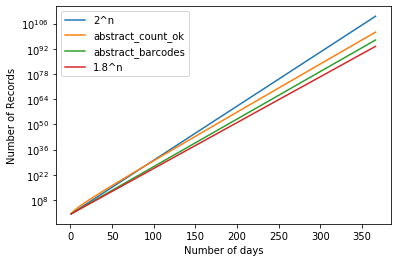

In [21]:
def logplots(X, fns, xlabel='', ylabel=''): 
    """Given fns={label: fn,...} plot fn(x) vs x for each fn."""
    plt.yscale('log'); plt.xlabel(xlabel); plt.ylabel(ylabel)
    for label in fns:
        plt.plot(X, [fns[label](x) for x in X], '-',  label=label)
    plt.legend()

logplots(range(1, 367, 5), {
    '2^n': (2).__pow__,
    'abstract_count_ok': abstract_count_ok,
    'abstract_barcodes': abstract_barcodes,
    '1.8^n': 1.8.__pow__}, 
    'Number of days', 'Number of Records')

# Problem: Pirates Counting Coconuts

The 538 Riddler poses [this problem](https://fivethirtyeight.com/features/pirates-monkeys-and-coconuts-oh-my) (slightly edited):

>Seven pirates wash ashore on a deserted island. They gather coconuts into a central pile. As the sun sets, they all go to sleep.
>
>One pirate wakes up in the middle of the night. Being greedy, this pirate decides to take some coconuts from the pile and hide them for himself. As he approaches the pile, though, he notices a monkey watching him. To keep the monkey quiet, the pirate tosses it one coconut from the pile. He then divides the rest of the pile into seven equal bunches and hides one of the bunches in the bushes. Finally, he recombines the remaining coconuts into a single pile and goes back to sleep.
>
>In succession, each of the pirates does the same routine. In the morning, the pirates split the pile into seven equal bunches and take one bunch each. (The monkey does not get one this time.)
>
>If there were *c* coconuts in the pile originally, what is the smallest possible value of *c*? What is *c* if there are *p* pirates?

At least for *p* = 7, it seems like an **enumerate and test** approach should work, where we enumerate the number of coconuts, *c* and check if each amount can be evenly divided multiple times as the story dictates. The function `coconuts_divisible` does the check and `enumerate_coconuts` enumerates values of *c* and returns the first one that works. We can be somewhat clever in the enumeration: we know that the first pirate throws one coconut to the monkey and then the pile is divisible by *p*. So the only numbers we need to consider for *c* are of the form *kp* + 1, which we write in Python as `range(1, maxsize, p)`.

In [22]:
def enumerate_coconuts(p=7) -> int:
    """Find the smallest number of coconuts, c, that makes the story work for p pirates."""
    return next(c for c in range(1, maxsize, p) if coconuts_divisible(p, c))

def coconuts_divisible(p, c) -> bool:
    """Can p pirates divide c coconuts evenly, following the steps of the story?"""
    for pirate in range(p):   # Each successive pirate
        c -= 1                # tosses the monkey one coconut
        if not divides(p, c): # divides the rest of the pile into p equal bunches
            return False
        c -= c // p           # and hides one bunch
    return divides(p, c)      # In the morning they split the pile evenly.
        
def divides(P, C) -> bool: return C % P == 0

In [23]:
enumerate_coconuts(7)

823537

That's a big pile of coconuts. Let's see how many coconuts are needed with fewer pirates:

In [24]:
[enumerate_coconuts(p) for p in range(1, 8)]

[1, 3, 25, 765, 3121, 233275, 823537]

The **shoulders of giants** search 
["1, 3, 25, 765, 3121"](https://www.google.com/search?q=%221+3+25+765+3121%22&oq=%221+3+25+765+3121%22)
yields as first result [oeis.org/A002021](https://oeis.org/A002021), titled "Pile of coconuts problem" so that is definitely the right page. The page gives a **formula calculation**:

In [25]:
def calculate_coconuts(p) -> int:
    """Find the smallest number of coconuts that makes the story work for p pirates."""
    return (p - 1) * (p ** p - 1) if divides(2, p) else p ** p - p + 1

We can verify the formula and use it to explore bigger numbers:

In [26]:
assert same(calculate_coconuts, enumerate_coconuts, range(1, 8))

{p: calculate_coconuts(p) for p in [*range(1, 10), *range(10, 61, 10)]}

{1: 1,
 2: 3,
 3: 25,
 4: 765,
 5: 3121,
 6: 233275,
 7: 823537,
 8: 117440505,
 9: 387420481,
 10: 89999999991,
 20: 1992294399999999999999999981,
 30: 5970842830744820999999999999999999999999999971,
 40: 471481069649705378135408639999999999999999999999999999999999999961,
 50: 435207425653061363846063613891601562499999999999999999999999999999999999999999999999951,
 60: 2883547000860666191870042384152701628073990160383999999999999999999999999999999999999999999999999999999999941}

In [27]:
calculate_coconuts(1000)

9989999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999999

That's a crazy number. Almost $10^{3003}$, and you surely noticed all the "9"s and the "001" at the end, but did you notice the lone "8" in the third digit? What's that doing there? Actually it's simple: you can think of the formula as first giving us $999 \times 1000^{1000}$, which is "999" followed by 3000 "0"s, and then subtracting 999, so that third "9" is where we borrow 1, and leads to all the following "0"s becoming "9"s.

In [28]:
Counter(str(calculate_coconuts(1000))), log(10, 10)

(Counter({'9': 2999, '8': 1, '0': 2, '1': 1}), 1.0)

## Extension: Non-Minimal Numbers of Coconuts

I'm curious what *other* numbers of coconuts *c* are possible, not just the minimal number for each  *p*. Below I compute the 7 smallest values of *c* for each number of pirates *p* in the range 1-7:

In [29]:
def kcoconuts(p=7, k=7) -> [int]:
    """Find the k smallest number of coconuts, c, that makes the story work for p pirates."""
    return list(islice((c for c in range(1, maxsize, p) if coconuts_divisible(p, c)), k))

{p: kcoconuts(p) for p in range(1, 8)}

{1: [1, 2, 3, 4, 5, 6, 7],
 2: [3, 11, 19, 27, 35, 43, 51],
 3: [25, 106, 187, 268, 349, 430, 511],
 4: [765, 1789, 2813, 3837, 4861, 5885, 6909],
 5: [3121, 18746, 34371, 49996, 65621, 81246, 96871],
 6: [233275, 513211, 793147, 1073083, 1353019, 1632955, 1912891],
 7: [823537, 6588338, 12353139, 18117940, 23882741, 29647542, 35412343]}

These numbers look like they're in arithmetic sequences (the same difference between each pair of adjacent numbers). I can test that:

In [30]:
def arithmetic_sequence(numbers) -> tuple:
    """Are the numbers in an arithmetic sequence? Return the first and the differences."""
    deltas = {numbers[i] - numbers[i - 1] for i in range(1, len(numbers))}
    return (numbers[0], deltas)

In [31]:
{p: arithmetic_sequence(kcoconuts(p)) for p in range(1, 8)}

{1: (1, {1}),
 2: (3, {8}),
 3: (25, {81}),
 4: (765, {1024}),
 5: (3121, {15625}),
 6: (233275, {279936}),
 7: (823537, {5764801})}

That confirms it (at least up to 7), and I see a pattern in the deltas: we have 2: 8 = 2<sup>3</sup>, 3: 81 = 3<sup>4</sup>, 4: 1024 = 4<sup>5</sup>, etc. I can verify the pattern (at least up to 7):

In [32]:
{p: p ** (p + 1) for p in range(1, 8)}

{1: 1, 2: 8, 3: 81, 4: 1024, 5: 15625, 6: 279936, 7: 5764801}

So we can say the complete set of valid number of coconuts for a given number of pirates *p* is:
    
- $(p - 1) × (p^p - 1) + k × p^{p+1}$ when $p$ is even, for any nonnegative integer $k$
- $p^p - p + 1  + k × p^{p+1}$ when $p$ is odd, for any nonnegative integer $k$

## Extension: Who Gets What?

We can also count who gets what shares of the coconuts, by annotating the story. The monkey is individual 0, and the pirates are 1 to *p*:

In [33]:
def coconuts_shares(p) -> dict:
    """Assuming p pirates divide coconuts evenly according to the story, who gets what share?"""
    c       = calculate_coconuts(p)
    monkey  = 0
    pirates = range(1, p + 1)
    shares  = Counter()
    def to(who, what): shares[who] += what; return what
    for pirate in pirates:       # Each successive pirate
        c -= to(monkey, 1)       # tosses the monkey one coconut
        assert divides(p, c)     # divides the rest of the pile into p equal bunches
        c -= to(pirate, c // p)  # and hides one bunch     
    for pirate in pirates:       # In the morning they split the pile evenly.
        to(pirate, c // p)
    return dict(shares)

In [34]:
coconuts_shares(7)

{0: 7,
 1: 157638,
 2: 140831,
 3: 126425,
 4: 114077,
 5: 103493,
 6: 94421,
 7: 86645}

In [35]:
assert total(_) == enumerate_coconuts(7)

It is best to be the first pirate; every other pirate does successively worse, with the last one getting about half of the first's share. The monkey always gets *p* coconuts from *p* pirates:

In [36]:
{p: coconuts_shares(p) for p in range(1, 7)}

{1: {0: 1, 1: 0},
 2: {0: 2, 1: 1, 2: 0},
 3: {0: 3, 1: 10, 2: 7, 3: 5},
 4: {0: 4, 1: 251, 2: 203, 3: 167, 4: 140},
 5: {0: 5, 1: 828, 2: 703, 3: 603, 4: 523, 5: 459},
 6: {0: 6, 1: 51899, 2: 45419, 3: 40019, 4: 35519, 5: 31769, 6: 28644}}

# Problem: Counting Rhyme Schemes

Here's another problem:

> How many rhyme schemes are there for a *k* line poem? 'ABAB' is a valid rhyme scheme, as is 'ABBA', but 'BAAB' is not: in a valid rhyme scheme the first occurrences of each letter forms a prefix of the alphabet.

Let's first make sure we understand what counts as a valid rhyme scheme. Given a string, first task pick out the **first occurrences** of letters. For example, for the string `"ABAB"`, we read left-to-right, recording each time we see a letter for the first time; that gives us `"AB"`; the subsequent occurrences of `'A'` and `'B'` don't matter. Given `"BAAB"`, the first occurrences are `"BA"`. Now we have to decide if these first occurrences form a **prefix of the alphabet**,  `"ABCD..."`. For `"AB"` the answer is yes, but for `"BA"` the answer is no. 

Before we get to the counting, below are the basic concepts.  Since we will want to go beyond *k* = 26, I will by default make the alphabet be the non-negative integers, so "letters" are integers. Use `alphabet` if you want strings of actual letters.

In [37]:
alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

def is_rhyme_scheme(s, alphabet=range(maxsize)) -> bool: 
    """Do the first occurrences of letters in `s` form a prefix of the alphabet?"""
    return is_prefix(first_occurrences(s), alphabet)

def is_prefix(short, long) -> bool:
    """Is the first argument a prefix of the second?"""
    return all(S == L for S, L in zip(short, long))

def first_occurrences(s) -> tuple: 
    """The first occurrences of each character, in the order they appear."""
    return tuple(Counter(s)) # Counters preserve order of elements

In [38]:
is_rhyme_scheme('ABAB', alphabet)

True

In [39]:
is_rhyme_scheme('BAAB', alphabet)

False

In [40]:
is_rhyme_scheme('ABBACABBADABBA', alphabet)

True

In [41]:
is_rhyme_scheme('ABBACABBADABBADO', alphabet)

False

We can count the number of valid strings by **brute force enumeration**: generate all possible strings of length $k$ and check each one with `is_rhyme_scheme`. The complexity of this algorithm is $O(k^{k+1})$, because there are $k^k$ strings, and to validate a string requires looking at $k$ characters:

In [42]:
def enumerate_rhyme_schemes(k) -> int: 
    """Enumerate all possible strings and count the number of valid rhyme schemes."""
    strings = product(range(k), repeat=k)
    return quantify(strings, is_rhyme_scheme)

{k: enumerate_rhyme_schemes(k) for k in range(8)}

{0: 1, 1: 1, 2: 2, 3: 5, 4: 15, 5: 52, 6: 203, 7: 877}

Now let's think about an **abstract incremental enumeration** strategy.
As with previous problems, I need a *summary* of the relevant information for strings of length *&nbsp;k*, to help me calculate the relevant information for length *&nbsp;k*+1. I know that if I have a valid string of length *&nbsp;k* with *d* distinct characters in it, then I can extend it by one character in *d* ways by repeating any of those *d* characters, or I can introduce a first occurrence of character number *d+1* (but I can do that in just 1 way). I can't validly introduce any other character. So a good summary would be a Counter of `{d: count, ...}`. We start with strings of length 0, which have a summary of `{0: 1}` (one string, the empty string, with 0 distinct characters) and we get this:

In [43]:
def abstract_rhyme_schemes(k) -> int: 
    """Count the number of strings that are valid rhyme schemes."""
    return total(iterate(extend_rhymes, Counter({0: 1}), k))

def extend_rhymes(counts) -> Counter:
    """Given a summary of the form {d: count}, return summary for one character more."""
    return Counter({d: d * counts[d] + counts[d - 1] 
                    for d in range(len(counts) + 1)})

We can see the summary for strings of length *k* = 3:

In [44]:
iterate(extend_rhymes, Counter({0: 1}), 3)

Counter({0: 0, 1: 1, 2: 3, 3: 1})

This says that for strings of length 3, there is 1 valid string with 1 distinct letter (which happens to be the string `'AAA'`, but the summary doesn't say that),  3 valid strings with 2 distinct letters (`'AAB', 'ABA', 'ABB'`) and 1 valid string with 3 distinct letters (`'ABC'`).

We can show that this approach gives the same results as brute force enumeration (at least up to 7):

In [45]:
same(enumerate_rhyme_schemes, abstract_rhyme_schemes, range(8))

True

And we can see that this approach can handle much bigger values of *k*:

In [46]:
abstract_rhyme_schemes(1000)

2989901335682408421480422353897646483947392809821230504783273788894541362512325959664116587254039157830063914708298696402802180224899338288101341127657482912115581175517083066603983883727397197167678238980081036180931925075539932527965676543525599930152977026710728161973380028169588154000757789910687867945116549253593045923371331634255154524281580236725728485261220108101638630853599014544734180045547233471386408052397896029636573699929593208055092856163302580062752491170014956210689589772504774477581224180093731049179781810757823392418731282463262909599383233478171300732348368829482532689745038681732741053292507461388832126413808384219620224295600131495344949724427184392274190825210765220134693388974107043535069024206200152269785527835601205571839285156781339712541914478047647919799092160201587370382076918260383678846578509356368602569026980215380243687353087700673715452389527302951023874599735629223263128277374876298938600397021442384394709402117798973755702036975156159500337295562141

That's a big number. 

A search for ["1, 1, 2, 5, 15"](https://www.google.com/search?q=%221%2C+1%2C+2%2C+5%2C+15%22) shows that this sequence is called [Bell numbers](https://en.wikipedia.org/wiki/Bell_number), and that they have lots of applications.

## Version 2: Recursion

Another way to keep track of the number of valid strings of length *&nbsp;k* with *&nbsp;d* distinct characters is with a recursive counting function, which I will call `count_rhymes(k, d)`. There are three cases: 

- `count_rhymes(0, 0)` is 1, because the empty string is valid (and contains no distinct characters). 
- `count_rhymes(k, d)` is 0 when `k` is negative (because there is no such thing as a negative length string) or less than `d` (because a string can't contain more distinct characters than its length). 
- Otherwise, there are `d` ways to add an existing letter to each of the strings of length `k - 1`, and there is one way to add a new letter.

In [47]:
@lru_cache(None)
def count_rhymes(k, d) -> int:
    """Count the number of valid strings of length k, that use d distinct characters."""
    return (1 if (k == 0 == d)    else
            0 if (k < 0 or k < d) else
            d * count_rhymes(k - 1, d) + count_rhymes(k - 1, d - 1))

Note that I used `lru_cache`, to avoid having to re-compute intermediate results.

Now I can define `calculate_rhyme_schemes(k)` as the sum of `count_rhymes(k, d)` over all values of `d`:

In [48]:
def calculate_rhyme_schemes(k) -> int: 
    """Count the number of strings that are valid rhyme schemes."""
    return sum(count_rhymes(k, d) for d in range(k + 1))

Let's validate this:

In [49]:
same(abstract_rhyme_schemes, calculate_rhyme_schemes, range(101))

True

# Problem: Counting Rectangle Sets

This problem is covered in depth in [another notebook](Golomb-puzzle.ipynb), so here I present just the part that has to do with counting things:

> Say you’re given the following challenge: create a set of five rectangles that have sides of length 1, 2, 3, 4, 5, 6, 7, 8, 9 and 10 units. You can combine sides in a variety of ways: for example, you could create a set of rectangles with dimensions 1 x 3, 2 x 4, 5 x 7, 6 x 8 and 9 x 10. How many different sets of five rectangles are possible?

This is a basic [combinatorics](http://en.wikipedia.org/wiki/Combinatorics) problem. I will present *three* methods to calculate the number of sets. If all goes well they will give the same answer. The example set of rectangles given in the problem was

     {1 × 3, 2 × 4, 5 × 7, 6 × 8, 9 × 10}
    
and in general it would be

     {A × B, C × D, E × F, G × H, I × J}

The question is: how many distinct ways can we assign the integers 1 through 10 to the variables A through J?
    
**Method 1: Count all permutations and divide by repetitions:** There are 10 variables to be filled, so there are 10! = 3,628,800 permutations.  But if we fill the first two variables with 1 × 3, that is the same rectangle as 3 × 1. So divide 10! by 2<sup>5</sup> to account for the fact that each of 5 rectangles can appear 2 ways.  Similarly, if we fill A and B with 1 × 3, that yields the same set as if we filled C and D with 1 × 3.  So divide again by 5! (the number of permutations of 5 things) to account for this.
That gives us:

In [50]:
factorial(10) / 2 ** 5 / factorial(5)

945.0

(It is always a relief when this "count and divide" method comes out to a whole number.)

**Method 2: Count without repetitions**: in each rectangle of the example set the smaller component is listed first, and in each set, the rectangles with smaller first components are listed first. Without loss of generality, let's assume that all rectangle sets must be of this form, and count how many sets there are that respect this ordering.  We'll work from left to right.  How many choices are there for variable A?  *Only one!* A must always be 1, because we agreed that the smallest number comes first. Then, given A, there are 9 remaining choices for B.  For C, given A and B, there is again only one choice: C must be the smallest of the remaining 8 numbers.  That leaves 7 choices for D, 5 for F, 3 for H and 1 for J. So:

In [51]:
9 * 7 * 5 * 3 * 1

945

(It is always a relief when two methods give the same answer.)
          
**Method 3: Write a program to enumerate and test:** We'll generate all permutations of sides, and then check which ones are valid rectangle sets: they must have the first element of each pair less than the second (i.e. A < B, C < D, ...) and the pairs must be sorted, which is equivalent to saying their first elements are sorted (i.e. A < C < E < G < I).

In [52]:
def valid_rectangle_set(sides) -> bool:
    """Are the sides ordered according to convention?"""
    A,B, C,D, E,F, G,H, I,J = sides
    return A < B and C < D and E < F and G < H and I < J and A < C < E < G < I

quantify(permutations(range(1, 11)), valid_rectangle_set)

945

(It is a relief that once again we get the same answer.)

# Problem: Counting Paths on a Grid

> In a grid, how many paths are there from the upper left to the lower right corner, making only rightward or downward moves?
     
Here is an example 11 × 6 grid, with three of the possible paths:

     ----------+     |..........     --+........
     ..........|     |..........     ..+-+......
     ..........|     +--+.......     ....+-+....
     ..........|     ...|.......     ......+-+..
     ..........|     ...|.......     ........|..
     ..........|     ...+-------     ........+--
     
We can use the same three methods as the previous problem:

**Method 1: Count all permutations and divide by repetitions:** Any path on this grid must consist of 10 right and 5 down moves, but they can appear in any order. Arranging 15 things in any order gives 15! = 1,307,674,368,000 possible paths. But that counts all the moves as being distinct, when actually the 10 right moves are indistinguishable, as are the 5 down moves, so we need to divide by the number of ways that they can be arranged. That gives us:

In [53]:
factorial(15) // (factorial(10) * factorial(5))

3003

**Method 2: Count without repetitions**: Another way to look at it is that there will be 15 total moves, so start with all 15 being "right" moves and  then choose 5 of them to become "down" moves. So the answer is (15 choose 5), which happens to lead to the same formula we just used:



In [54]:
def choose(n, k) -> int: return factorial(n) // (factorial(n - k) * factorial(k))

choose(15, 5)

3003

**Method 3: Write a program to count the paths:** The function `count_paths(start, goal)` counts the number of paths from the start location to the goal location, where a location is an `(x, y)` pair of integers.
In general, the number of paths to the goal is the number of paths to the location just to the left of the goal, plus the number of paths to the location just above the goal. But there are two special cases: there is only one path (the empty path) when the start is equal to the goal, and there are zero paths when the goal is an invalid destination (one with a negative coordinate).

In [55]:
@lru_cache(None)
def count_paths(start=(0, 0), goal=(5, 10)) -> int:
    """Number of paths to goal, using only 'right' and 'down' moves."""
    (x, y) = goal
    return (1 if goal == start else
            0 if x < 0 or y < 0 else
            count_paths(start, (x - 1, y)) + 
            count_paths(start, (x, y - 1)))
    
count_paths()

3003

Even though `count_paths` is slower than the `choose` calculation, it can still handle reasonably large grids:

In [56]:
N = 100
assert count_paths(goal=(N, N)) == choose(2 * N, N)
count_paths(goal=(N, N))

90548514656103281165404177077484163874504589675413336841320

Why bother with the recursive function `count_paths` when the `choose` formula works so well? Good question. One reason is **checking**: the two different approaches validate each other by giving the same answer. Another reason is that we can modify `count_paths` to handle things that are hard to do with just the formula. For example, what if we have a grid with some obstacles in it?  I'll define a `Grid` constructor, which adopts the convention that the input is a string of rows, where a `'.'` character within a row is a passable square, and all other (non-whitespace) characters are impassible barriers. Then `count_grid_paths` finds the number of paths on a grid from start to goal (by default, from upper left to lower right):

In [57]:
def Grid(text): return tuple(text.split())

passable = '.'

@lru_cache(None)
def count_grid_paths(grid, start=(0, 0), goal=None) -> int:
    """Number of paths from start to goal on grid, using only 'right' and 'down' moves."""
    if goal is None: goal = (len(grid[-1]) - 1, len(grid) - 1) # bottom right
    (x, y) = goal
    return (1 if goal == start else
            0 if x < 0 or y < 0 or grid[y][x] != passable else
            count_grid_paths(grid, start, (x - 1, y)) + 
            count_grid_paths(grid, start, (x, y - 1)))

We can verify that we get the same answer on the 11 by 6 empty grid:

In [58]:
count_grid_paths(Grid("""
...........
...........
...........
...........
...........
...........
"""))

3003

Here's a grid where there are only two paths around the walls:

In [59]:
count_grid_paths(Grid("""
...........
.........|.
.........|.
.........|.
.--------+.
...........
"""))

2

If we put a hole in the wall, there should be many paths (but less than 3003 because most of the wall remains):

In [60]:
count_grid_paths(Grid("""
...........
.........|.
.........|.
.........|.
.------.-+.
...........
"""))

122

Here are a couple of bigger examples, courtesy of [ascii-art-generator.org](https://www.ascii-art-generator.org/):

In [61]:
count_grid_paths(Grid("""
....................................................................................................
...................................NK0OkdddolcccccccccclloddxkO0XN..................................
............................X0kdlc:cccccclodxllxxxkkxdloddolccccccccodkKN...........................
.......................N0xl:cccllcco0.XXXXXX.l,O.NNNNo,kXXXXXXXNklllolccccokKN......................
..................X.0dc::loool:,XXXdXXXXXXXXN:.X''X''X.dXXXXXXX.KcXX';coooolcclkX...................
.................Kd.:cooo:'X.....'O.XXXXXXXXX;.........oXXXXXXXXXNo......X,lddoc:ckX................
...............Oc,c.oc'..........l.XXXXXXXXXOX.........:NXXXXXXXXX0'.........X;oxoc;oK..............
.............0c,lxl..............,O.XXXXXXXK;..........XlNXXXXXXXXlX............X;dxc,oX............
...........Nx':xlX................X;dOKXX0d'.............,d0XK0xl'.................,xx;;O...........
...........dXlk,......................XXXX.................XXX......................Xl0:xO..........
..........OX:0:.......................................................................d0x;X.........
..........lXdOX.......................................................................;XlXk.........
..........lXdOX.......................................................................;XlXk.........
.........XkX:0:...............XX....................................XX................dK,;K.........
..........NoXlk,...........XoOKK0xc'.....X'..............XXX....X;okKXKO:X..........Xl0:Xk..........
...........XoX:xcX.........o.XXXXXXNk:X,kNNO:..........Xl0NKoX'oK.XXXXXXX:.........'xk;,k...........
...........X.k;'lo;X.......l.XXXXXXXX.XXXXXXNxX.......,O.XXX.XNXXXXXXXXXK,.......'oxc'cK............
.............XNx;,:lc,.....Xd.XXXXXXXXXXXXXXX.O'.....cXXXXXXXXXXXXXXXXXX:.....Xcoo:,cO..............
...............XNOl;;:c:;X..XlXXXXXXXXXXXXXXXXX0,...oNXXXXXXXXXXXXXXX.O,..X;c.lc;:dK................
..................XNkl:;;:.:::oXXXXXXXXXXXXXXXXX0:'.NXXXXXXXXXXXXXXXNkc:cccc:..:d0..................
......................NKko.;;;:lxOKX.XXXXXXXXXXXXNN.XXXXXXXXXXX..X0Odc::::cdOX......................
...........................N0kdl:;;:;;:clodxxkkkkOO.Okkxxddolc::::;:cldOK...........................
..................................XKOkxdolcc:;;::;;.::;::cllodxk0KN.................................
....................................................................................................
""")) 

627084695807418

In [62]:
count_grid_paths(Grid(r"""
.....................................................................................................
.................WXK0kxdd.oooooooooodxOXW............................................................
..........W0xdoooooooodxk.00KKKKK00OxdoolokXW........................................................
..........Wk',xKXNW....................WXkollOW......................................................
............0:c0W..........WNN.............NkccOW....................................................
.............Xd:dN.........Nkooodk0XW........Nk:lKW..................................................
..............W0lckN........WNKOxooooodk0NW....Xo:ckW................................................
................WOccxX.............WX0xdoooodOKNWkc;dN.WKOK..........................................
..................WOocoON................WXOxoododd:.ld:..cX.........................................
.....................XxlloxKN..................NOl:'....;dKW.........................................
.......................WXkoloooxO0XNNWWWNXK0k.oll;'...;ON............................................
...........................WN0kdooooooooooooo.kKO;...dN......WN0kdocc.WW.clodk0NW....................
....................NX0OkkkO0XWW...WWNNNW......Xc...xW...WXko;.....',.Nd.;'.....;lkKW................
...............WXOo.;;::ccc::::cokKW..........Wx...oN..Nkc...,cdOKXNW....WNXKOdl;...;o0N.............
.............Nkc,;c.OXW.....WX0xl:;:lkXW......X;.,d0.Xd'..;d0N..................WKkl'..,dKW..........
..........WKo,,lONW..............WXkl:;cxKW......oNXd'..cON.........................NOl...lKW........
.........Kl',xX......................W0dc::lkKo..cd;..c0W.............................WXd'..oX.......
.......Nd''xN...........................WXOoc:'.....'kW..................................Xo..,.W.....
......K:.lK.................................WNx'...;K.....................................W0;..xW....
....W0,.xN..................................Nx...o0X........................................X:..xW...
....0,.kW...................................WOcl.W...........................................X:.'O...
...K;.xW.........................................................................................cN..
..Nl.lN.......................................................................................Wl..k..
..k.,K.........................................................................................k..oW.
.Nc.oW............................................................................................cN.
.K,.O..........................................................................................K,.:X.
.k.;X..........................................................................................K,.:N.
.x.:N..........................................................................................0'.lW.
.d.cN..........................................................................................k.....
.d.cN.........................................................................................Wo..O..
.x.;X.........................................................................................K,.:X..
.O.'0........................................................................................Wx..dW..
.K,.x........................................................................................X;.,K...
.Wl.cN......................................................................................Wd..dW...
..O.'O......................................................................................0,.:X....
..Nc.lN....................................................................................Nl..O.....
...O'.k...................................................................................Wx..oW.....
...Wd.;K..................................................................................0,.:X......
....Xc.cN................................................................................X:.'0.......
.....K,.oN..............................................................................No..xW.......
......0,.dN............................................................................Wx..oW........
.......0,.oN..............................................................................cN.........
........0;.cX.........................................................................0,.;K..........
.........Kc.;0W......................................................................X;..0...........
..........Nd..dN....................................................................Xc...............
...........W0;.;OW.................................................................Xc..kW............
.............Nd'.c0W..............................................................K:..kW.............
...............Xo..:ON..........................................................Nk'.;0W..............
.................Xd'.,dKW.....................................................NO:..oX................
...................Xx:..:d0N........................WNXK0000KKXNW.........WXO....c0W.................
.....................WKx:'.,cdOKNW...........WNKOxol;'........'',;:cclllc.;......KW..................
........................WXOo:,..';cloodddoolc;'..',;ldk00K000Okxoolc:::::.ldOXW......................
.............................NKOxolc:;;,,;:ccodk0NWW.................................................
.....................................WWWWW...........................................................
.....................................................................................................
"""))

11468451846417028993973305727890751485

Can you verify that these last three answers are correct?

# Problem: Paths in a 2 x *n* Grid

Nicolas Schank proposes this problem:

> How many ways can you arrange the integers 1 through 2*n* in a 2 x *n* grid such that any two consecutive numbers are placed into squares that share a side?

Another way of stating the problem is: how many paths are there that visit every square in  2 x *n* grid once,  moving from a square to any of its orthogonal neighbors. (The integers 1 is then the first square in the path, 2 the second, and so on.)

The **brute force enumeration** strategy would be to generate all (2*n*)! permutations of the integers and check if they form a valid path. That should work fine up to  *n* = 6, but not much beyond that.

Therefore I'll go to the  **incremental enumeration strategy**, in which I start with paths of length 1 and extend them one square at a time, checking for validity at each step, until we find all the paths that reach all 2*n* squares. (This is not an **abstract** strategy: these are individual paths, not summaries of them.)

I'll describe a `Path` with three components, `Path(end, n, squares)`:
  - `end`: the `(x, y)` coordinates of the square that the path ends in.
  - `n`: the width of the grid. (This is the same for every path in a problem instance, but I had to store it somewhere.)
  - `squares`: a dict of `{(x, y): i}` entries giving the order of the squares visited.
  
The approach then is that we start with one-square paths of the form `Path(s, n, {s: 1})` for every square `s` in the grid. Then we `iterate` calling `extend_paths` until we have all the complete paths. A path is extended by  placing the integer `len(squares) + 1` in any square that neighbors `path.end` and does not already appear in `path.squares`.

In [63]:
Path = namedtuple('Path', 'end, n, squares')

def incremental_count_paths(n) -> [Path]:
    """Extend every path as far as possible and return the ones of length 2*n"""
    grid = product(range(n), (0, 1))
    paths = [Path(s, n, {s: 1}) for s in grid]
    return iterate(extend_paths, paths, 2 * n - 1)

def extend_paths(paths) -> [Path]:
    """Return a list of paths that validly extend these paths by one square."""
    return [Path(end2, n, {end2: len(squares) + 1, **squares})
            for (end,  n, squares) in paths
            for end2 in neighbors(n, *end) if end2 not in squares]

def neighbors(n, x, y):
    """The squares that neighbor `(x, y)` in a nx2 grid."""
    if x < n-1: yield (x + 1, y)
    if x > 0:   yield (x - 1, y)
    yield (x, 1 - y)

In [64]:
incremental_count_paths(2)

[Path(end=(0, 1), n=2, squares={(0, 1): 4, (1, 1): 3, (1, 0): 2, (0, 0): 1}),
 Path(end=(1, 0), n=2, squares={(1, 0): 4, (1, 1): 3, (0, 1): 2, (0, 0): 1}),
 Path(end=(0, 0), n=2, squares={(0, 0): 4, (1, 0): 3, (1, 1): 2, (0, 1): 1}),
 Path(end=(1, 1), n=2, squares={(1, 1): 4, (1, 0): 3, (0, 0): 2, (0, 1): 1}),
 Path(end=(1, 1), n=2, squares={(1, 1): 4, (0, 1): 3, (0, 0): 2, (1, 0): 1}),
 Path(end=(0, 0), n=2, squares={(0, 0): 4, (0, 1): 3, (1, 1): 2, (1, 0): 1}),
 Path(end=(1, 0), n=2, squares={(1, 0): 4, (0, 0): 3, (0, 1): 2, (1, 1): 1}),
 Path(end=(0, 1), n=2, squares={(0, 1): 4, (0, 0): 3, (1, 0): 2, (1, 1): 1})]

Let's try to get a better understanding by visualizing the paths:

In [65]:
def show_paths(paths, cols=4):
    """Plot all the paths in a matrix of subplots."""
    n = paths[0].n
    P = len(paths)
    fig, axs = plt.subplots(P // cols, cols, figsize=(14, 2 * n))
    for y in range(P // cols):
        for x in range(cols):
            if paths:
                path = paths.pop()
                _, X, Y = zip(*(sorted((i, x, y) for (x, y), i in path.squares.items())))
                axs[y, x].axis('off')
                axs[y, x].plot(X, Y, 's-', clip_on=False)
                axs[y, x].plot(X[:1], Y[:1], 'rs', clip_on=False)
    fig.tight_layout(pad=3.0)
    fig.suptitle(f'{P} Paths for a 2x{n} Grid:')
    plt.show()

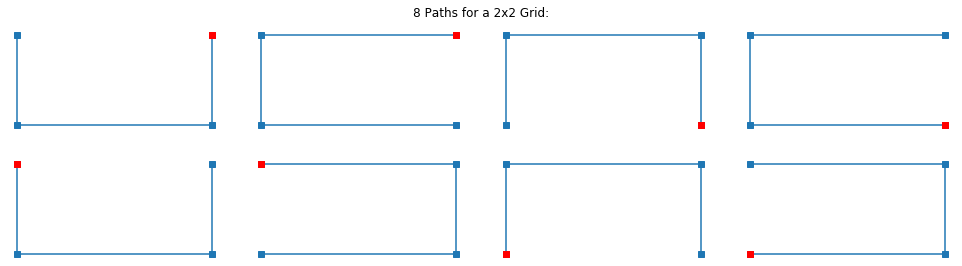

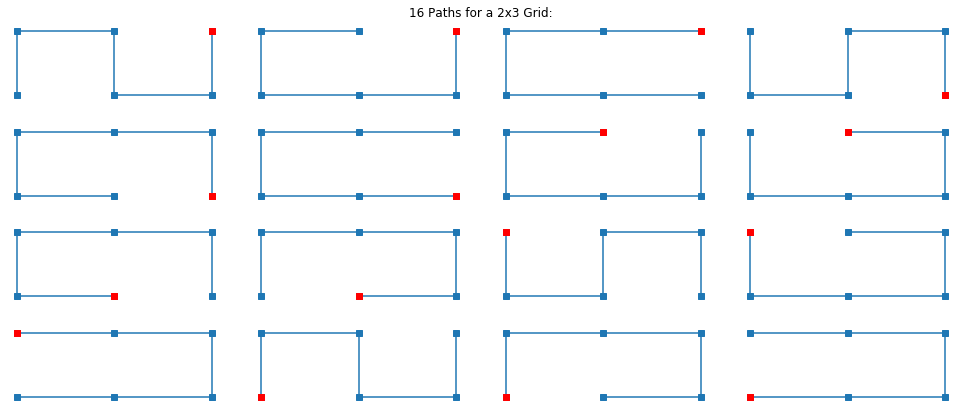

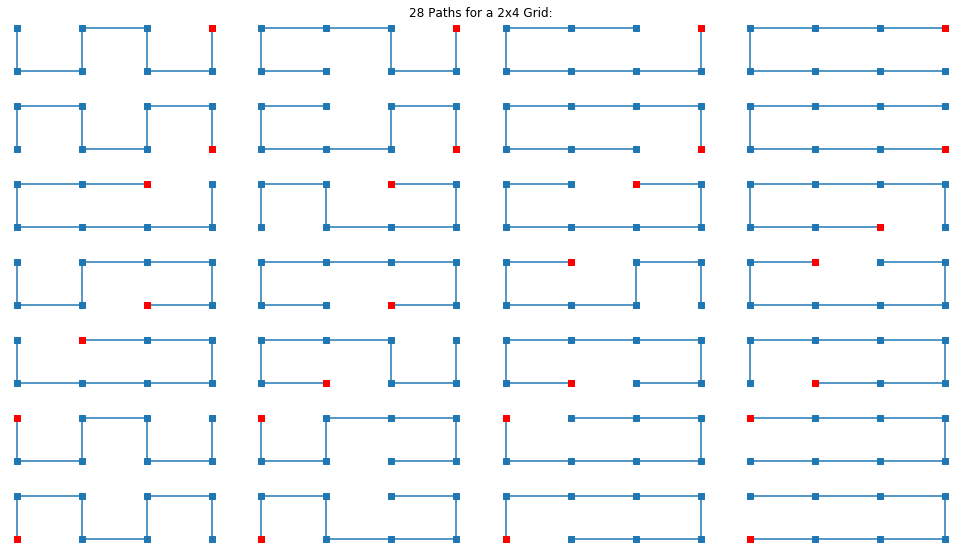

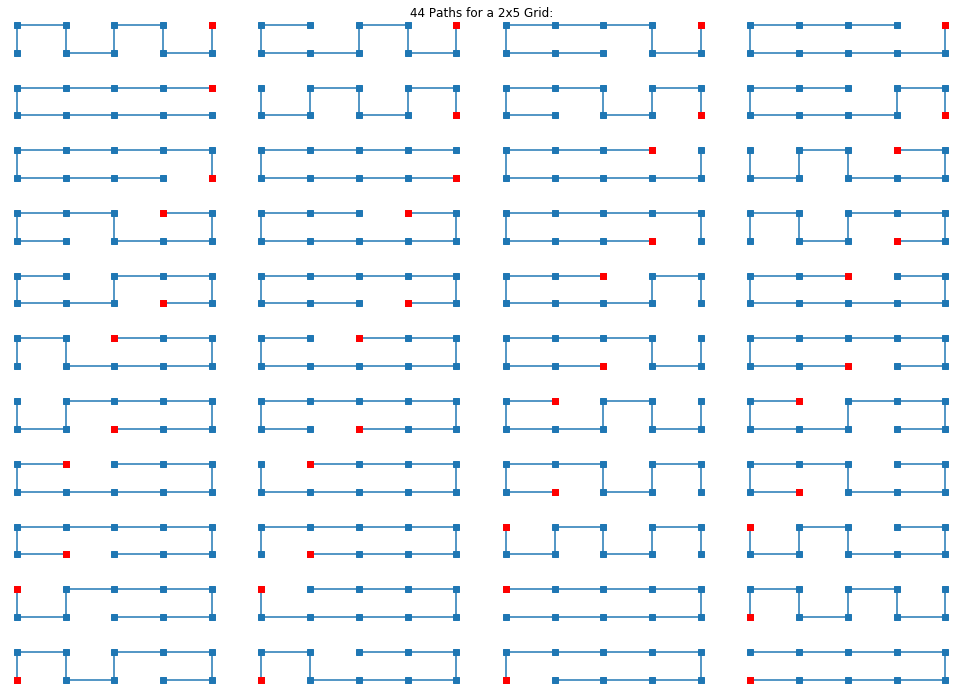

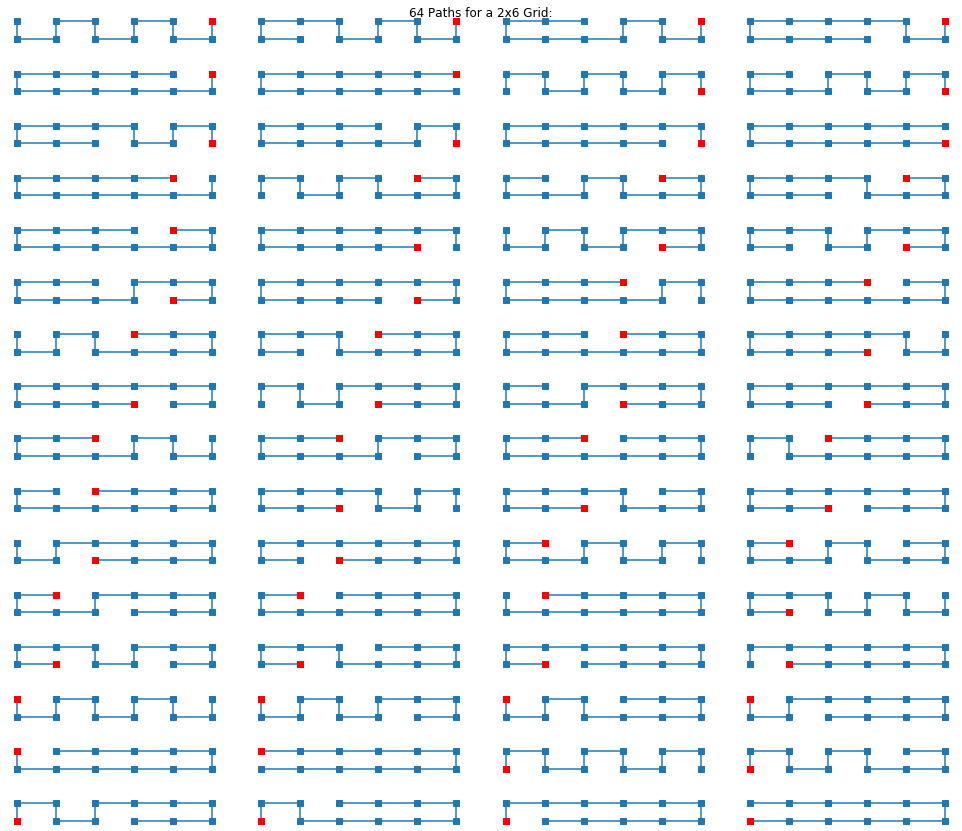

In [66]:
for n in (2, 3, 4, 5, 6):
    show_paths(incremental_count_paths(n))

Let's also create a table of number of paths as a function of `n`:

In [67]:
{n: len(incremental_count_paths(n)) for n in range(1, 13)}

{1: 2,
 2: 8,
 3: 16,
 4: 28,
 5: 44,
 6: 64,
 7: 88,
 8: 116,
 9: 148,
 10: 184,
 11: 224,
 12: 268}

The visualization was interesting, and the number of valid paths makes it clear that this is not growing too quickly; probably polynomial rather than exponential. But I have no clue about a general formula for *n*.

I'll try the **standing on shoulders** approach. I'll search for the first few elements of the sequence,
["2, 8, 16, 28, 44, 64"](https://www.google.com/search?q=%222%2C+8%2C+16%2C+28%2C+44%2C+64%22), and see if anyone has reported on them.  It turns out the [first search result](https://oeis.org/search?q=2%2C+8%2C+16%2C+28%2C+44%2C+64&language=english&go=Search) is from the online encyclopedia of integer sequences (a famous source for this kind of knowledge) for a sequence described as "Number of (directed) Hamiltonian paths in the n-ladder graph." I know that a Hamiltonian path is a path that visits each vertex once, so that sounds right, and I had never heard the phrase "n-ladder graph," but it makes sense that it is a 2 x *n* grid. So it looks like we're in the right place. The page gives this **calculation** formula:

In [68]:
def calculate_paths(n): return 2 if n == 1 else 2 * (n ** 2 - n + 2)

In [69]:
all(calculate_paths(n) == len(incremental_count_paths(n)) for n in range(1, 13))

True

Our work here is done.

# Problem: Counting Positions in Fischerandom Chess

> In this [variant](https://en.wikipedia.org/wiki/Chess960) of chess, the pieces are set up in a random but restricted fashion. The pawns are in their regular positions, and the major white pieces are placed randomly on the first rank, with two restrictions: the bishops must be placed on opposite-color squares, and the king must be placed between the rooks. The black pieces are set up to mirror the white pieces. How many starting positions are there?

We can answer by **enumerate and test**: generate all *distinct* permutations of the pieces and count the number that are valid:

In [70]:
def valid_position(pieces) -> bool:
    """Valid if bishops are on different colors, and king is between rooks."""
    pieces = ''.join(pieces) # make `pieces` be a string (e.g. 'RNKBRQBN')
    B, R, K = map(pieces.index, 'BRK')
    b, r    = map(pieces.rindex, 'BR')
    return (color(B) != color(b)) and (r < K < R or R < K < r)

def color(square): return 'BW'[square % 2]

In [71]:
quantify(set(permutations('RNBKQBNR')), valid_position)

960

(*Note:* initially my program failed because I forgot that while tuples, lists and strings all have an `index` method, only strings have `rindex`.  How annoying! I had to fix the problem by adding `pieces = ''.join(pieces)`. In Ruby, both strings and arrays have `index` and `rindex`. In Julia, both stringsss and arrays have `findfirst` and `findlast`. In  Java and Javascript, both strings and lists/arrays have both `indexOf` and `lastIndexOf`. What's wrong with Python? )

We could also do this by **calculation**. Let's handle the bishops first. The first bishop can go on any of the 8 squares, but then the second bishop has to go on an opposite color, so that's 4 choices. But then we divide by 2! = 2 because the two bishops are indistinguishable. Next, place the other pieces in the 6 remaining squares, for 6! possibilities, but divide by 2! because the knights are indistinguishable, and divide by 3! because, out of the 3! ways of ordering R-K-R left-to-right, only 2 of them are valid, but the 2 cancels out because the rooks are indistinguishable.

In [72]:
(8 * 4 / factorial(2))   *   factorial(6) / (factorial(2) * factorial(3))

960.0

# Problem: Counting Change

> How many ways are there to select coins that add up to a specified amount of money? For example, to make 10 cents change with  10, 5, and 1 cent coins, there are four ways: `{10,  5+5,  5+1+1+1+1+1,  1+1+1+1+1+1+1+1+1+1}`. 

This is a well-known problem with a [Wikipedia page](https://en.wikipedia.org/wiki/Change-making_problem). But we'll tackle it in our own way. To start, I will use the term **mint** to describe a set of coin denominations. (I could have used  **denominations**, but "mint" is shorter, and I can say "mints" to refer to several sets,  but I can't say "denominationses.") The US mint produces coins in the following denominations:

In [73]:
mint = (100, 50, 25, 10, 5, 1) # Denominations of coins in US

Conceptually a mint is a set, but the counting will be more efficient if the mint is ordered, with the largest values first.

For this problem we will take a recursive **divide and conquer** approach with **remembering**. `count_change(amount, mint)` says how many ways there are to add up to `amount` using coins in `mint`. For example, `count_change(10, (10, 5, 1))` is 4. We analyze `count_change` as follows:
- There are three simple cases where we can answer immediately without having to divide the input:
   - If the amount is zero cents there is one way to add up to the amount: with no coins.
   - If the amount is negative, there are no ways.
   - If the amount is positive but there are no denominations in the mint then there are no ways.
- Otherwise, we **divide** the possibilities into two parts and **conquer** by adding up the numbers from each part:
   - Part 1: Use a coin of the first denomination in the mint. Figure out how many ways to make the rest of the amount with the mint.
   - Part 2: Skip the first denomination in the mint. Figure out how many ways to make the whole amount without the denomination.

In [74]:
@lru_cache(None)
def count_change(amount, mint=mint) -> int:
    """The number of ways of adding up to `amount`, using coins from `mint`."""
    return (1 if amount == 0 else
            0 if amount < 0 or not mint else
            count_change(amount - mint[0], mint) + 
            count_change(amount, mint[1:]))                

We can count the ways to make change for various amounts:

In [75]:
count_change(10)

4

In [76]:
count_change(25)

13

In [77]:
count_change(99)

252

How many different piles of coins total up to $1000?

In [78]:
count_change(10**5)

13398445413854501

## Aside: Recursion and @lru_cache

*Quiz Question*: Wait a minute! Why doesn't `count_change(10**5)` raise a `RecursionError`? Doesn't `count_change` have to follow a chain of 100,000 recursive calls to handle the case where 100,000 1's total up to the amount? And isn't 100,000 larger than `sys.getrecursionlimit()`?
    
*Quiz Answer*: We would indeed get a `RecursionError` if any of the following were true:
- The `@lru_cache` decorator were not used on `count_change`.
- We called `count_change(10**6)` instead of `count_change(10**5)`.
- The `mint` was ordered with the `1` first, not the `100`.
- The order of the two recursive calls to `count_change` were reversed. 

As it is, `count_change` fills the cache in such a way that it avoids too many recursive calls. To see what's happening, I'll create a plot of the call depth (on the y axis) for each successive recursive call to `count_change` (on the x-axis) in the execution of `count_change(10**5)`:

In [79]:
@lru_cache(None)
def count_change_with_depths(amount, mint=mint) -> int:
    """The number of ways of adding up to `amount`, using coins from `mint`.
    This version appends call depths to `plot_depths.depths`."""
    global depth, depths
    depth += 1
    depths.append(depth)
    result = (1 if amount == 0 else
              0 if amount < 0 or not mint else
              count_change_with_depths(amount - mint[0], mint) + 
              count_change_with_depths(amount, mint[1:]))
    depth -= 1
    return result

def plot_depths(amount, mint=mint, show=slice(None)):
    """Plot the call depths for `count_change(amount, mint)`."""
    global depth, depths
    depth, depths = 0, []
    count_change_with_depths.cache_clear()
    count_change_with_depths(amount, mint)
    plt.figure(figsize=(12, 6))
    plt.xlabel('Call Number'); plt.ylabel('Depth')
    X, Y = range(1, len(depths) + 1), depths
    plt.plot(X[show], Y[show], '.-')
    plt.grid(True); plt.gca().invert_yaxis()

(Note: this would be cleaner if done as a decorator to track depths, and with `depth` and `depths` being attributes rather than global variables.)

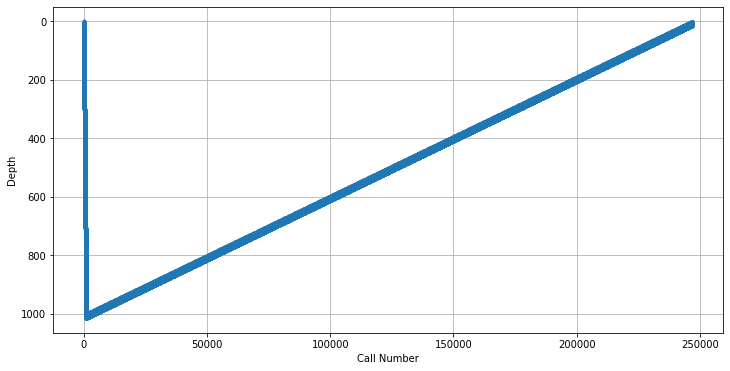

In [80]:
plot_depths(10**5)

It  looks like we first do a little over 1000 levels of recursion, then start popping the stack to return to the top level. But we can't really see from this plot how it happens; let's zoom in on the key part of the graph:

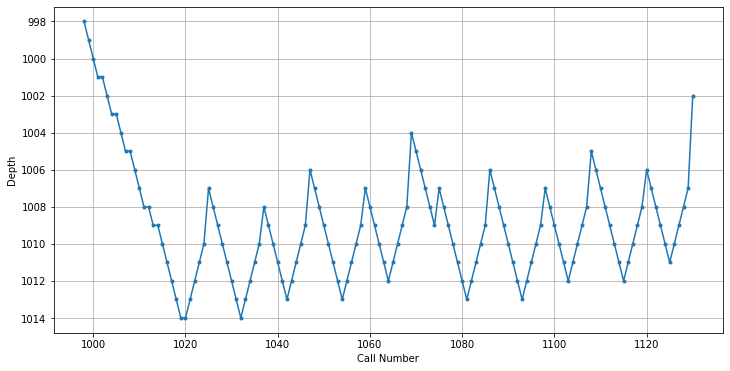

In [81]:
plot_depths(10**5, show=slice(997, 1130))

We can see that right at call number 1000 is the first time when the depth does not increase; it goes sideways for one step. Then we recurse to a maximum depth of 1014, and then gradually start zig-zagging back to the top level. We can figure out why this happens:
- First there are 1000 consecutive calls to `count_change_depths(amount - 100, mint)`. We can see there is a blue dot right at the (1000 calls, 1000 depth) grid point.
- The last of these calls is a call to `count_change_depths(0, mint)`, which returns without a recursive call, giving us the first sideways step (at  call number 1001-1002, depth 1001).
- Call 1002 is the first recursive call to `count_change_depths(amount, mint[1:])` (this time with `amount=100`).
- We eventually fill in the cache entries for all amounts below 100, without ever going below depth 1014.
- We start returning up the stack: a zig up.
- Eventually we return and move on to a recursive call of `count_change_depths(200, mint[1:])`. 
- To fill in the cache entries for 200 to 100: a zig down, but never as far down as 2014.
- We alternate returning up the stack, and going deeper to fill in entries for the next 100 amounts.

The pattern is easier to see with a limited mint of three coins: `(100, 10, 1)`:

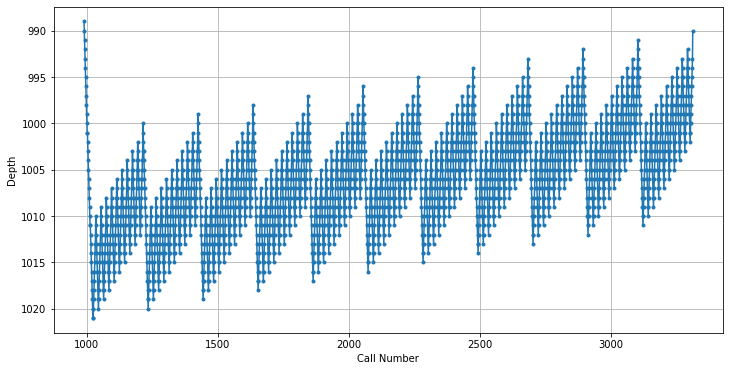

In [82]:
plot_depths(10**5, mint=(100, 10, 1), show=slice(988, 3314))

Each parallelogram corresponds to another 100 amounts being filled in. The depth never goes below 1021, and the parallelograms are gradually making their way up from the depths to the surface.

## Variant Problem: Show Change

Instead of *counting* how many ways there are to make change, we could *show* the actual coins in each way. 
I'll use the term **purse** for a collection of coins, because it is a [**bag**](https://en.wikipedia.org/wiki/Multiset) of coins. I'll implement `Purse` as a `Counter` of `{denomination: count}` pairs. (A purse is different than a mint: a mint just lists the denominations; a purse lists the denominations and how many coins we have of each denomination.) For example, `Purse({10: 2, 1: 4})` means two 10-cent coins and four 1-cent coins, for a total of 24 cents. I'll give the `Purse` class two methods to add or subtract one or more coins of the same denomination; these methods produce a new `Purse` and do not modify the old one.

In [83]:
class Purse(Counter): 
    """A bag of coins (or of any objects, really)."""
    def add(self, coin, n=1): return Purse(self + Counter({coin: n}))
    def sub(self, coin, n=1): return Purse(self - Counter({coin: n}))

So `show_change` will return a list of Purses. The overall structure of the function is the same as `count_change`, but because of the additional complication of having to build up lists of purses for the results, I switch the body of the function from an *expression* to *statements*, to allow for the assignment of intermediate values to mnemonic variable names.

In [84]:
@lru_cache(None)
def show_change(amount, mint=mint) -> [Purse]:
    """List all the purses that adds up to `amount`, using `mint`."""
    if amount == 0:
        return [Purse()] 
    elif amount < 0 or not mint:
        return []
    else:
        coin = mint[0]
        use  = show_change(amount - coin, mint)
        skip = show_change(amount, mint[1:])
        return [purse.add(coin) for purse in use] + skip

In [85]:
show_change(11)

[Purse({1: 1, 10: 1}),
 Purse({1: 1, 5: 2}),
 Purse({1: 6, 5: 1}),
 Purse({1: 11})]

In [86]:
show_change(15)

[Purse({5: 1, 10: 1}),
 Purse({1: 5, 10: 1}),
 Purse({5: 3}),
 Purse({1: 5, 5: 2}),
 Purse({1: 10, 5: 1}),
 Purse({1: 15})]

In [87]:
show_change(25)

[Purse({25: 1}),
 Purse({5: 1, 10: 2}),
 Purse({1: 5, 10: 2}),
 Purse({5: 3, 10: 1}),
 Purse({1: 5, 5: 2, 10: 1}),
 Purse({1: 10, 5: 1, 10: 1}),
 Purse({1: 15, 10: 1}),
 Purse({5: 5}),
 Purse({1: 5, 5: 4}),
 Purse({1: 10, 5: 3}),
 Purse({1: 15, 5: 2}),
 Purse({1: 20, 5: 1}),
 Purse({1: 25})]

##  Variant Problem: Show Limited Change

> The above assumed that we had a limitless supply of coins of each denomination. What if we only have a limited number of coins in our purse?

I'll define `show_limited_change`, which, instead of takling a mint as argument, takes a purse with a specific number of coins of each denomination. We use the same strategy as `show_change`:

In [88]:
def show_limited_change(amount, purse) -> [Counter]:
    """List all the ways of making change that adds up to `amount`, using `coins`."""
    if amount == 0:
        return [Purse()] 
    elif amount < 0 or not purse:
        return []
    else:
        coin = max(purse)
        use  = show_limited_change(amount - coin, purse.sub(coin, n=1))
        skip = show_limited_change(amount,        purse.sub(coin, n=purse[coin]))
        return [purse.add(coin) for purse in use] + skip

In [89]:
show_limited_change(11, Purse({10: 4, 5: 3, 1: 11}))

[Purse({1: 1, 10: 1}),
 Purse({1: 1, 5: 2}),
 Purse({1: 6, 5: 1}),
 Purse({1: 11})]

In [90]:
show_limited_change(11, Purse({10: 4, 5: 1, 1: 4}))

[Purse({1: 1, 10: 1})]

In [91]:
show_limited_change(25, Purse({25: 1, 10: 1, 5: 2, 1: 4})) 

[Purse({25: 1})]

In [92]:
show_limited_change(25, Purse({10: 12, 1: 4}))

[]

## Variant Problem: Optimal mint

The  [July 20, 2018 Riddler](https://fivethirtyeight.com/features/damn-the-torpedoes-two-puzzles-ahead/) poses this problem (slightly edited  here):

> If Riddler Nation needed to make change (anywhere from 0.01 to 0.99) and was establishing its own mint, what values of coins would be ideal to yield the smallest number of coins in an average transaction? You can assume that all amounts of change from 0.01 to 0.99 are equally likely. Let’s limit our mint to four different coin denominations.  

Technically this is an optimization problem, not a counting problem, but we'll answer it anyway. (It is an interesting problem that boasts at least one  [journal article](https://cs.uwaterloo.ca/~shallit/Papers/change2.pdf).) Here's how I address the problem:
- The function `meancoins(mint)` will give the mean number of coins required to make each amount of change from 0 to 99 cents.
- The function `mincoins(amount, mint)` computes how many coins are needed for a given amount, or returns an absurdly large number (`maxsize`) if the amount cannot be made. (A mint that contains a `1` can make any amount.)
- The variable `mints` holds a list of possible four-coin mints, such as `(27, 13, 3, 1)`.  I know that a 1 cent piece is required; otherwise I can't make an amount of 1 cent. That leaves 3 coins that could be anywhere from 2 to 99 cents; `mints` enumerate all the possible combinations.

In [93]:
@lru_cache(None)
def mincoins(amount, mint) -> int:
    """The minimum number of coins, taken from mint, that add to amount."""
    return (0       if amount == 0 else
            maxsize if not mint or amount < min(mint) else
            min(mincoins(amount, mint[1:]),
                mincoins(amount - mint[0], mint) + 1))

def meancoins(mint, minimizer=mincoins, amounts=range(100)) -> float: 
    """The mean number of coins needed to make change for all the amounts."""
    return sum(minimizer(a, mint) for a in amounts) / len(amounts)

mints = [(L, M, S, 1) for S, M, L in combinations(range(2, 100), 3)]
len(mints)

152096

Now I can sort the mints by `meancoins`:

In [94]:
%time mints.sort(key=meancoins)

CPU times: user 33.2 s, sys: 2.42 s, total: 35.7 s
Wall time: 49.1 s


And look at the top 10, along with the US system:

In [95]:
topmints = mints[:10] + [(25, 10, 5, 1)]

In [96]:
{mint: meancoins(mint) for mint in topmints}

{(25, 18, 5, 1): 3.89,
 (29, 18, 5, 1): 3.89,
 (30, 18, 4, 1): 3.9,
 (28, 17, 4, 1): 3.91,
 (29, 19, 4, 1): 3.91,
 (30, 19, 5, 1): 3.91,
 (28, 21, 5, 1): 3.91,
 (32, 19, 4, 1): 3.92,
 (30, 23, 5, 1): 3.92,
 (31, 14, 6, 1): 3.92,
 (25, 10, 5, 1): 4.7}

Interesting! The mint on the top line, (25, 18, 5, 1), is almost the US system of coins; we just need to trade in the dime for an 18 cent piece. It takes an average of 3.89 coins to make any amount from 0 to 99 (as does the mint on the second line, `(29, 18, 5, 1)`). We could also consider trading in the quarter for a 29 or 30 cent piece. The US system, at 4.7 mean number of coins, is almost a full coin behind the best mint.

However, I'm not sure that `meancoins` is the best measure of a mint system. For one thing, it can be mentally taxing to compute the minimum purse of coins for an amount. It is mentally easier to use a **greedy approach** which says: to make change, start with the largest coin available, and use as many of those as possible; then continue to the other coins in decreasing order. With this approach you never have to compare two possible options. 

I'll define `greedy_mincoins(amount, mint)` to say how many coins are needed to make `amount` from `mint` using the greedy aprroach, and  `show_greedy_limited_mincoins(amount, purse)` to show the coins that can make up `amount`, drawing only from `purse`. 

In [97]:
def greedy_mincoins(amount, mint) -> int: 
    """The number of ways of adding up to `amount`, using coins from `mint`."""
    bank = Purse({d: 1000 for d in mint})
    return total(show_greedy_limited_mincoins(amount, bank))

def show_greedy_limited_mincoins(amount, purse) -> Purse:
    """Change, taken greedily from purse, that adds to amount."""
    change = Purse()
    for coin in sorted(purse, reverse=True):
        while coin <= amount:
            amount -= coin
            change[coin] += 1
            purse = purse.sub(coin)
    return change if amount == 0 else None

def is_canonical(mint) -> bool:
    """Does this mint give the same results with `mincoins` and `greedy_mincoins`?"""
    return same(lambda a: mincoins(a, mint), 
                lambda a: greedy_mincoins(a, mint), 
                range(100))

The greedy approach is not optimal for all amounts and mints. For example, to make the amount 30 with the mint `(25, 10, 1)` the greedy approach takes the 25, and then must add five 1-cent coins for a total of 6 coins. The optimal `mincoins` approach selects three 10-cent coins. A mint for which the greedy algorithm is optimal for all amounts is called a **canonical** system.

In [98]:
greedy_mincoins(30, (25, 10, 1))

6

In [99]:
greedy_mincoins(6, (4, 3, 1))

3

In [100]:
show_greedy_limited_mincoins(30, Purse({25: 1, 10: 3, 1: 7}))

Purse({25: 1, 1: 5})

Now let's compare the mean number of coins needed under the optimal and greedy approaches, and check which mints are canonical:

In [101]:
{mint: (meancoins(mint, mincoins), meancoins(mint, greedy_mincoins), is_canonical(mint))
 for mint in topmints}

{(25, 18, 5, 1): (3.89, 4.58, False),
 (29, 18, 5, 1): (3.89, 4.45, False),
 (30, 18, 4, 1): (3.9, 4.38, False),
 (28, 17, 4, 1): (3.91, 4.44, False),
 (29, 19, 4, 1): (3.91, 4.41, False),
 (30, 19, 5, 1): (3.91, 4.48, False),
 (28, 21, 5, 1): (3.91, 4.62, False),
 (32, 19, 4, 1): (3.92, 4.41, False),
 (30, 23, 5, 1): (3.92, 4.6, False),
 (31, 14, 6, 1): (3.92, 4.45, False),
 (25, 10, 5, 1): (4.7, 4.7, True)}

Now it looks like maybe `(30, 18, 4, 1)` is the best mint: it is only 0.01 behind the leader in optimal score, and it has the best greedy score.

We also see that among the mints shown, only the US system, `(25, 10, 5, 1)` is canonical: it gets the same score under greedy and optimal approaches. However, even its optimal score,  4.7, is worse than the greedy score of all the mints above it.

# Variant: Mean Purse Size

Here's another criteria for a mint system: I would like to not accumulate too many coins in my purse/pocket. Suppose I do a cash transaction in which I owe a certain amount of cents, `amount`. If I happen to have coins in my purse that add up to `amount`, I will pay with them (and end up with fewer coins). If I don't, I'll pay for the cents with a dollar bill, and I'll receive `100 - amount` in change back (and end up with more coins). (I won't allow the scenario where, say, I owe 24¢ and pay 25¢ and get 1¢ back.) Will some mints lead to accumulation of more coins than others? I'll do a random **simulation** to see:

In [102]:
@lru_cache(None)
def purse_stats(mint, t=25000, seed=42):
    """The mean and standard deviation of the number of coins in a purse
    after each of `t` random transactions."""
    random.seed(seed)
    purse = Purse()
    bank  = Purse({c: 100 for c in mint})
    sizes = []
    for _ in range(t):
        amount = random.randrange(1, 100)
        pay    = show_greedy_limited_mincoins(amount, purse)
        if pay:
            purse -= pay
        else:
            change = show_greedy_limited_mincoins(100 - amount, bank)
            purse += change
        sizes.append(total(purse))
    return mean(sizes), stdev(sizes)

I can compare various mints:

In [103]:
purse_stats((25, 10, 5, 1))

(5.6928, 4.441767365800834)

In [104]:
purse_stats((25, 18, 5, 1))

(6.47408, 4.9299959784987575)

This says that the US system leaves me, on average, with fewer coins in my purse. But the standard deviation is large compared to the mean, so this may not be very reliable in the short run.

One more thing I'm interested in is what is the *worst* amount for a mint: the amount that requires the most coins? And what are those coins?

In [105]:
def worst_amount(mint):
    """What amount (and coins) requires the most number of coins for mint?"""
    amount = max(range(100), key=lambda a: mincoins(a, mint)) # Worst amount
    coins = min((list(c.elements()) for c in show_change(amount, mint)), key=len)
    return amount, coins
    

In [106]:
worst_amount(mint)

(94, [1, 1, 1, 1, 5, 10, 25, 50])

Here is a report summarizing all we have learned about the various mints:

In [107]:
def mint_report(mints):
    print('Mint of Coins   Mean Greedy Canon  PurseSize  Amount-requiring-most-coins')
    for mint in mints:
        m, g = meancoins(mint), meancoins(mint, greedy_mincoins)
        mu, sd = purse_stats(mint)
        a, coins = worst_amount(mint)
        print(f'{mint}  {m:.2f}  {g:.2f}  {m==g!s:5} {mu:4.1f} ± {sd:3.1f}  {a:2}¢ {len(coins)}: {coins[::-1]}')

In [108]:
mint_report(topmints)

Mint of Coins   Mean Greedy Canon  PurseSize  Amount-requiring-most-coins
(25, 18, 5, 1)  3.89  4.58  False  6.5 ± 4.9  14¢ 6: [5, 5, 1, 1, 1, 1]
(29, 18, 5, 1)  3.89  4.45  False  8.4 ± 6.5  14¢ 6: [5, 5, 1, 1, 1, 1]
(30, 18, 4, 1)  3.90  4.38  False  7.1 ± 5.7  15¢ 6: [4, 4, 4, 1, 1, 1]
(28, 17, 4, 1)  3.91  4.44  False  6.4 ± 5.0  99¢ 7: [28, 28, 17, 17, 4, 4, 1]
(29, 19, 4, 1)  3.91  4.41  False  7.7 ± 6.0  15¢ 6: [4, 4, 4, 1, 1, 1]
(30, 19, 5, 1)  3.91  4.48  False  6.1 ± 4.6  14¢ 6: [5, 5, 1, 1, 1, 1]
(28, 21, 5, 1)  3.91  4.62  False  7.6 ± 6.1  19¢ 7: [5, 5, 5, 1, 1, 1, 1]
(32, 19, 4, 1)  3.92  4.41  False  6.5 ± 5.2  15¢ 6: [4, 4, 4, 1, 1, 1]
(30, 23, 5, 1)  3.92  4.60  False  6.4 ± 4.9  19¢ 7: [5, 5, 5, 1, 1, 1, 1]
(31, 14, 6, 1)  3.92  4.45  False  6.8 ± 5.1  98¢ 7: [31, 31, 14, 14, 6, 1, 1]
(25, 10, 5, 1)  4.70  4.70  True   5.7 ± 4.4  94¢ 9: [25, 25, 25, 10, 5, 1, 1, 1, 1]


The US system (bottom row) has the advantage of being canonical, and of being natural for people with five fingers on a hand. But its mean number of coins needed is high, as is its maximum number of coins, 9 (to make 94¢). The `(25, 18, 5, 1)` mint has the best (tied) `mincoins` mean score, the best (tied) maximum-number-of-coins score, and pretty good greedy and purse-size scores. It might have been a better system overall, but not by enough of a margin to seriously consider a switch.

# Problem: Drink Gift Cards

[538 Riddler](https://fivethirtyeight.com/features/does-your-gift-card-still-have-free-drinks-on-it/) presents this problem:
    
> Lucky you! You’ve won two gift cards, each loaded with 50 free drinks from your favorite coffee shop, Riddler Caffei-Nation. The cards look identical, and because you’re not one for record-keeping, you randomly pick one of the cards to pay with each time you get a drink. One day, the clerk tells you that the card you presented doesn’t have any drink credits left on it. How many free drinks can you expect are still available on the other card?

Can I **enumerate** all sequences of choosing one card or the other? No: that would be (100 choose 50) ≅ 10<sup>29</sup> sequences. But I can to use recursive **divide and conquer**:  I'll define `other_card(a, b)` to return a probability distribution of the number of drinks remaining on the "other" card, when we start with two cards with `a` and `b` drinks remaining, respectively, and we use them until one card is exhausted. At every step, the function considers decrementing both `a` and `b`, with equal probability (1/2 each). 

I can define a probability distribution, `Dist`, as a subclass of `Counter` to which I add a method for multiplying by a scalar.

In [109]:
class Dist(Counter):
    """A frequency distribution of {item: frequency}."""
    def __mul__(self, scalar): return Dist({x: scalar * self[x] for x in self})
    __rmul__ = __mul__

@lru_cache(None)
def other_card(a, b):
    """Probability distribution of drinks remaining on other card when one card runs out."""
    a, b = sorted((a, b)) # Ensure a <= b
    return (Dist({b: 1})  if a == 0 else
            Dist(1/2 * other_card(a - 1, b) + 
                 1/2 * other_card(a, b - 1)))

If I have one free drink on each card and I use one, then the other card has one drink with probability  1.0:

In [110]:
other_card(1, 1)

Dist({1: 1.0})

If I start with two free drinks on each card and I use them randomly until one runs out, then it is equally likely that there are 1 or 2 left on the other card:

In [111]:
other_card(2, 2)

Dist({2: 0.5, 1: 0.5})

Here's the full probability distribution for the original question:

In [112]:
other_card(50, 50)

Dist({50: 1.7763568394002505e-15,
      49: 4.440892098500626e-14,
      48: 5.662137425588298e-13,
      47: 4.907185768843192e-12,
      46: 3.2510105718586146e-11,
      45: 1.755545708803652e-10,
      44: 8.046251165350071e-10,
      43: 3.2185004661400285e-09,
      42: 1.1465907910623852e-08,
      41: 3.6945703267565744e-08,
      40: 1.0898982463931894e-07,
      39: 2.9724497628905167e-07,
      38: 7.554976480680063e-07,
      37: 1.8015713146237074e-06,
      36: 4.053535457903342e-06,
      35: 8.647542310193795e-06,
      34: 1.7565320317581147e-05,
      33: 3.409738649883399e-05,
      32: 6.345902487282993e-05,
      31: 0.0001135582550355904,
      30: 0.00019588798993639344,
      29: 0.00032647998322732244,
      28: 0.0005268199729349975,
      27: 0.0008245877837243439,
      26: 0.0012540605877474397,
      25: 0.0018560096698662107,
      24: 0.0026769370238454962,
      23: 0.0037675409965232907,
      22: 0.005180368870219524,
      21: 0.006966702963398672,
 

We can compute the expected value, `EV`, of this distribution:

In [113]:
def EV(P): 
    """Expected value of a probability distribution."""
    return sum(b * P[b] for b in P)

EV(other_card(50, 50))

7.958923738717876

So on average, we expect about 8 drinks left on the other card.

What if we were given two different gift cards to begin with? Say a 25- and a 50-drink card?

In [114]:
EV(other_card(25, 50))

25.008494650139617

That's interesting. The expectation is almost exactly 25 drinks remaining on the other card (which in almost all cases will be the card that originally had 50 drinks). That doesn't mean there will always be 25 left, or even a number close to that. We see below that the remaining drinks on the other card is in the range 20-30 about half the time:

In [115]:
P = other_card(25, 50)
sum(P[d] for d in range(20, 30))

0.5148807410710244

We can plot the probability distribution of `other_card(n, n)` for various values of  `n`:

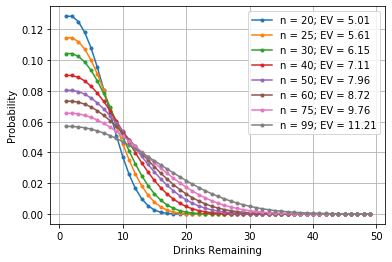

In [116]:
def show_other_cards(ns):
    X = list(range(1, max(ns) // 2 + 1))
    for n in ns:
        P = other_card(n, n)
        Y = [P[b] for b in X]
        plt.plot(X, Y, '.-', label=f'n = {n}; EV = {float(EV(P)):.2f}')
        plt.grid(True)
        plt.xlabel('Drinks Remaining'); plt.ylabel('Probability')
        plt.legend()
        
show_other_cards((20, 25, 30, 40, 50, 60, 75, 99))

# Counting Multiplications in Matrix Multiplication

> Given a sequence of matrices to be multiplied together,  what is the minimum number of multiplications of the constituent numbers, out of all the possible bracketings of the sequence?

See [Wikipedia's matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication) page for a refresher if needed, but we will explain everything here. A matrix is a two-dimensional grid of numbers. When we multiply two matrices, we do a lot of multiplications of the constituent numbers.  In the diagram below we see that multiplying a matrix of dimensions $l × m$ by a $m × n$ matrix results in a $l × n$ matrix, $C$, where each element $C_{ij}$ is the dot product of two $m$ element vectors, for a total of $l × m × n$ multiplications of constituent numbers. (Forget about [Strassen](https://en.wikipedia.org/wiki/Strassen_algorithm) for now.)

![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/18/Matrix_multiplication_qtl1.svg/440px-Matrix_multiplication_qtl1.svg.png)

$$\sum_{k=1}^{m} A_{ik} × B_{kj} = C_{i,j}$$

To multiply *three* matrices together, we could do either **(AB)C** or **A(BC)**; both give the same answer, but one might do fewer constituent multiplications. For a sequence of four matrices, there are five possible bracketings: **((AB)C)D,     (A(BC))D,     (AB)(CD),     A((BC)D)**, or     **A(B(CD))**. We want to find the bracketing with the fewest constituent multiplications.

Here's how I start to think about it:

- We don't need to represent the contents of the matrices, just the dimensions.
- `Matrix(c, m, n)` will represent a matrix of dimensions $m × n$ that requires $c$ constituent multiplications. I'll implement `Matrix` as a `namedtuple` to which I add a method for multiplication. (To be clear: it doesn't do matrix multiplication; it just computed the count of constituent multiplications and the dimensions of the product.)
- `M(m, n)` is a handy abbreviation for `Matrix(0, m, n)`

Here is the  code:

In [117]:
class Matrix(namedtuple('_', 'count, d1, d2')):
    """Contains the dimensions (d1, d2) and a count of the number of multiplies."""  
    def __mul__(A, B):
        assert A.d2 == B.d1
        count = A.count + B.count + A.d1 * A.d2 * B.d2
        return Matrix(count, A.d1, B.d2)

def M(m, n): return Matrix(0, m, n)

Some examples of use:

In [118]:
A, B, C = M(10, 100), M(100, 5), M(5, 20)

A * B

Matrix(count=5000, d1=10, d2=5)

In [119]:
B * C

Matrix(count=10000, d1=100, d2=20)

In [120]:
(A * B) * C

Matrix(count=6000, d1=10, d2=20)

In [121]:
A * (B * C)

Matrix(count=30000, d1=10, d2=20)

The bracketing **(AB)C** results in 6000 multiplications; five times less than **A(BC)**. Here's how to find the best product of a sequence of matrices:

- `multbest(matrices)` will return a `Matrix` that is the product of `matrices` and has the minimum number of constituent multiplications.
- The **brute force enumeration** approach  would be to try every possible bracketing. How many bracketings are there? It turns out the answer is again the [Catalan numbers](https://en.wikipedia.org/wiki/Catalan_number), so for 10 matrices there are only 4,862 possibilities; no problem. But for 25 matrices, there are 1,289,904,147,324 possibilities.
- We don't need to evaluate every bracketing. Consider splitting the sequence of matrices into two parts, *left* and *right*. We don't need to find every way of bracketing *left* and combine each of those with every way of bracketing *right*; we only need to find the one best way of bracketing *left* and combine it with the one best way of bracketing *right*. We do have to consider every way of splitting *left* and *right*, but there are only *O(n)* of those.
- So the algorithm for `multbest` will be a form of the **incremental enumeration** with **remembering** approach:
   - For every way of splitting the sequence of matrices, recursively find the best matrix products for the *left* and *right* parts of the split, and multiply them to get a candidate.
   - Out of those candidates, return the one with the minimum number of multiplications. (Since `Matrix` was defined as a namedtuple with the count as the first field, the `min` matrix is the one with the minimum count.)
   - We use `@lru_cache` to stop the algorithm from repeating itself.

In [122]:
@lru_cache(None)
def multbest(matrices):
    """Find the product of matrices that uses the least number of multiplications."""
    return (matrices[0] if len(matrices) == 1 else
            min(multbest(left) * multbest(right) 
                for left, right in splits(matrices)))
    
def splits(seq): return [(seq[:i], seq[i:]) for i in range(1, len(seq))]

In [123]:
splits("ABCDEF")

[('A', 'BCDEF'),
 ('AB', 'CDEF'),
 ('ABC', 'DEF'),
 ('ABCD', 'EF'),
 ('ABCDE', 'F')]

In [124]:
multbest((A, B, C))

Matrix(count=6000, d1=10, d2=20)

In [125]:
example = (A, B, C, M(20, 99), M(99, 10), M(10, 100), M(100, 80), M(80, 10), A, B, C)

multbest(example)

Matrix(count=75350, d1=10, d2=20)

We see it takes 75,350 constituent multiplications to work out the matrix product of the sequence of eleven `example` matrices. Is that a lot or a little? We can compare this optimal result to the pessimal result:

In [126]:
def multworst(matrices):
    """Find the product of matrices that uses the MOST number of multiplications."""
    return (matrices[0] if len(matrices) == 1 else
            max(multworst(left) * multworst(right) 
                for left, right in splits(matrices)))

In [127]:
multworst(example)

Matrix(count=3407000, d1=10, d2=20)

That's 45 times more work! It seems worthwhile to take the optimal approach.

# Conclusion

Thanks for making it all the way to the end of the notebook. I hope you've learned something about methods for counting things, and that you can apply them to your own problems.